# Réalisez une régression linéaire sans utiliser de package python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Implémentation de la normalisation (centrage et réduction)  
Formule de la standardisation   

<img src="img/CR.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

In [2]:
mu = []
std = []

def normalize(data):
	for i in range(0,data.shape[1]-1):
		mu.append(data[:,i].mean())
		std.append(data[:,i].std())
		data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))

## Import des données normalisées

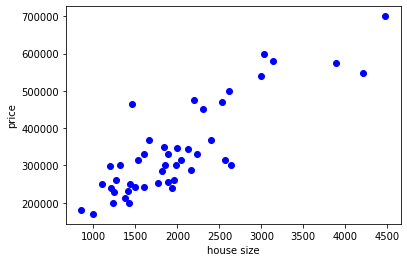

In [3]:
def plot_data(x, y):
	plt.xlabel('house size')
	plt.ylabel('price')
	plt.plot(x[:,0], y, 'bo')
	plt.show()

def load_data(filename):
	df = pd.read_csv(filename, sep=",", index_col=False)
	df.columns = ["housesize", "rooms", "price"]
	data = np.array(df, dtype=float)
	plot_data(data[:,:2], data[:, -1])
	normalize(data)
	return data[:,:2], data[:, -1]

x,y = load_data("house_price_data.txt")

## Implémentation de la fonction h(x)  
Les implémentations des fonctions suivantes sont vectorisées  
<img src="img/vectorized_h.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

In [4]:
def h(theta,x):
	return np.dot(x, theta)

## Implémentation de la fonction coût

<img src="img/cost_function.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

In [5]:
def cost_function(x, y, theta):
	return np.dot((h(theta,x)-y).T, h(theta,x)-y) / (2*x.shape[1])

## Implémentation de la descente du gradient  
Definition epoch :  

An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed. Datasets are usually grouped into batches (especially when the amount of data is very large). ... Many models are created with more than one epoch

<img src="img/vectorized_gradient-descent.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

In [6]:
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
	m = x.shape[0]
	J_all = []
	
	for epoch in range(num_epochs):
		h_x = h(theta,x)
		cost_ = np.dot(x.T, (h_x - y)) / m
		theta = theta - (learning_rate)*cost_
		J_all.append(cost_function(x, y, theta))

	return theta, J_all 

## Test du code

Cost:  [[3.19662144e+10]]
Parameters:  [[ 3.37371711e+05]
 [ 1.04066024e+05]
 [-6.47874139e+01]]


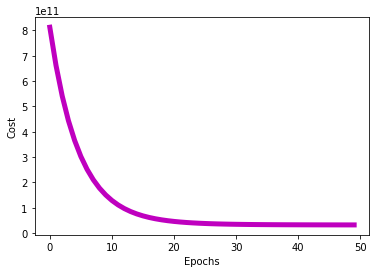

Price of house:  [311311.48999522]


In [7]:
def plot_cost(J_all, num_epochs):
	plt.xlabel('Epochs')
	plt.ylabel('Cost')
	plt.plot(num_epochs, J_all, 'm', linewidth = "5")
	plt.show()
    
    
def test(theta, x):
	x[0] = (x[0] - mu[0])/std[0]
	x[1] = (x[1] - mu[1])/std[1]
	y = theta[0] + theta[1]*x[0] + theta[2]*x[1]
	print("Price of house: ", y)
    
    
y = np.reshape(y, (46,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 50
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost: ", J)
print("Parameters: ", theta)

#for testing and plotting cost 
n_epochs = []
jplot = []
count = 0
for i in J_all:
	jplot.append(i[0][0])
	n_epochs.append(count)
	count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)

test(theta, [1800, 4])